In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC 
from sklearn.linear_model import Lasso

In [3]:
data = pd.read_excel('C:/Users/aksha/OneDrive/Desktop/machineLearning/edureka/Major Project Dataset (Wine Classification).xlsx')

In [4]:
data.shape

(1599, 12)

In [5]:
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1213,9.6,0.38,0.42,1.9,0.071,5.0,13.0,0.99659,3.52,0.75,10.5,6.0
1218,8.2,0.40,0.31,1.9,0.082,8.0,24.0,0.99600,3.52,0.69,10.6,6.0
431,7.8,0.55,0.35,2.2,0.074,21.0,66.0,0.99740,3.52,0.56,9.2,5.0
319,9.6,0.77,0.12,2.9,0.082,30.0,74.0,0.99865,3.52,0.64,10.4,6.0
156,7.1,0.43,0.42,5.5,0.070,29.0,129.0,0.99730,3.42,0.72,10.5,5.0


In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [7]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
data.shape

(1596, 12)

In [11]:
corelation = data.corr()

<Axes: >

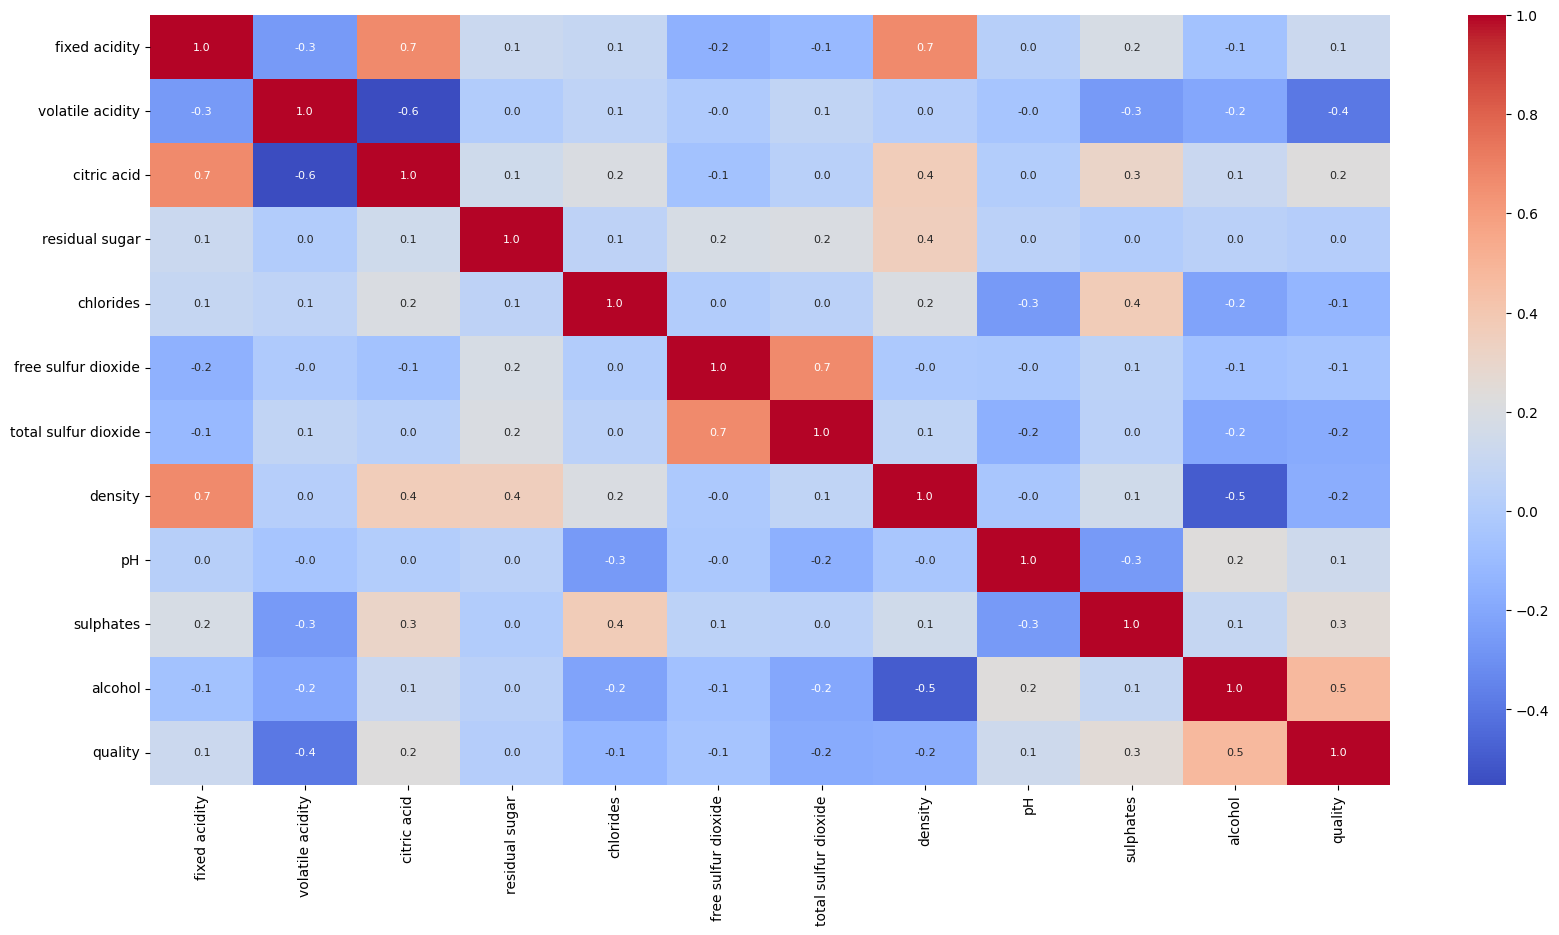

In [12]:
plt.figure(figsize=(20,10))
sns.heatmap(corelation,fmt='.1f',annot=True,annot_kws={'size':8} ,cmap='coolwarm')

In [173]:
data.quality.unique()

array([5., 6., 7., 4., 8., 3.])

In [174]:
data.quality.value_counts()

quality
5.0    679
6.0    637
7.0    199
4.0     53
8.0     18
3.0     10
Name: count, dtype: int64

C:\Users\aksha\AppData\Local\Temp\ipykernel_19132\2783352664.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data['fixed acidity'],x=data.quality, palette='inferno')


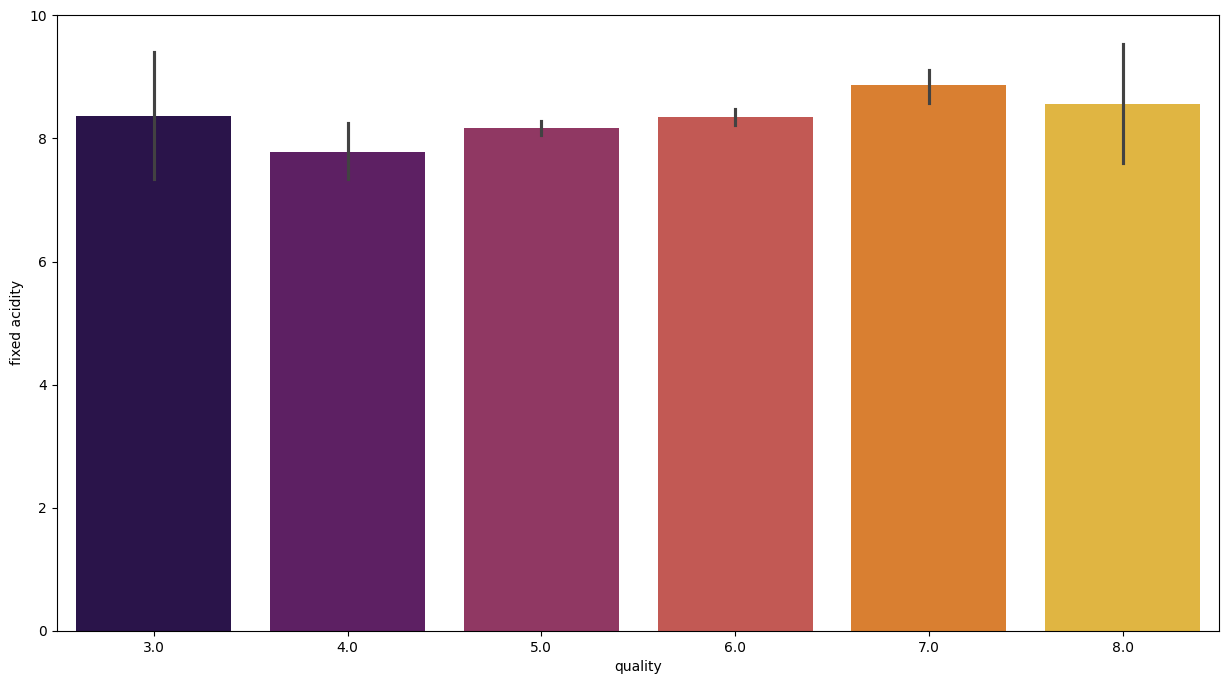

In [175]:
plt.figure(figsize=(15,8))
sns.barplot(y=data['fixed acidity'],x=data.quality, palette='inferno')
plt.show()

C:\Users\aksha\AppData\Local\Temp\ipykernel_19132\2222918337.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data.pH,x=data.quality,palette='inferno')


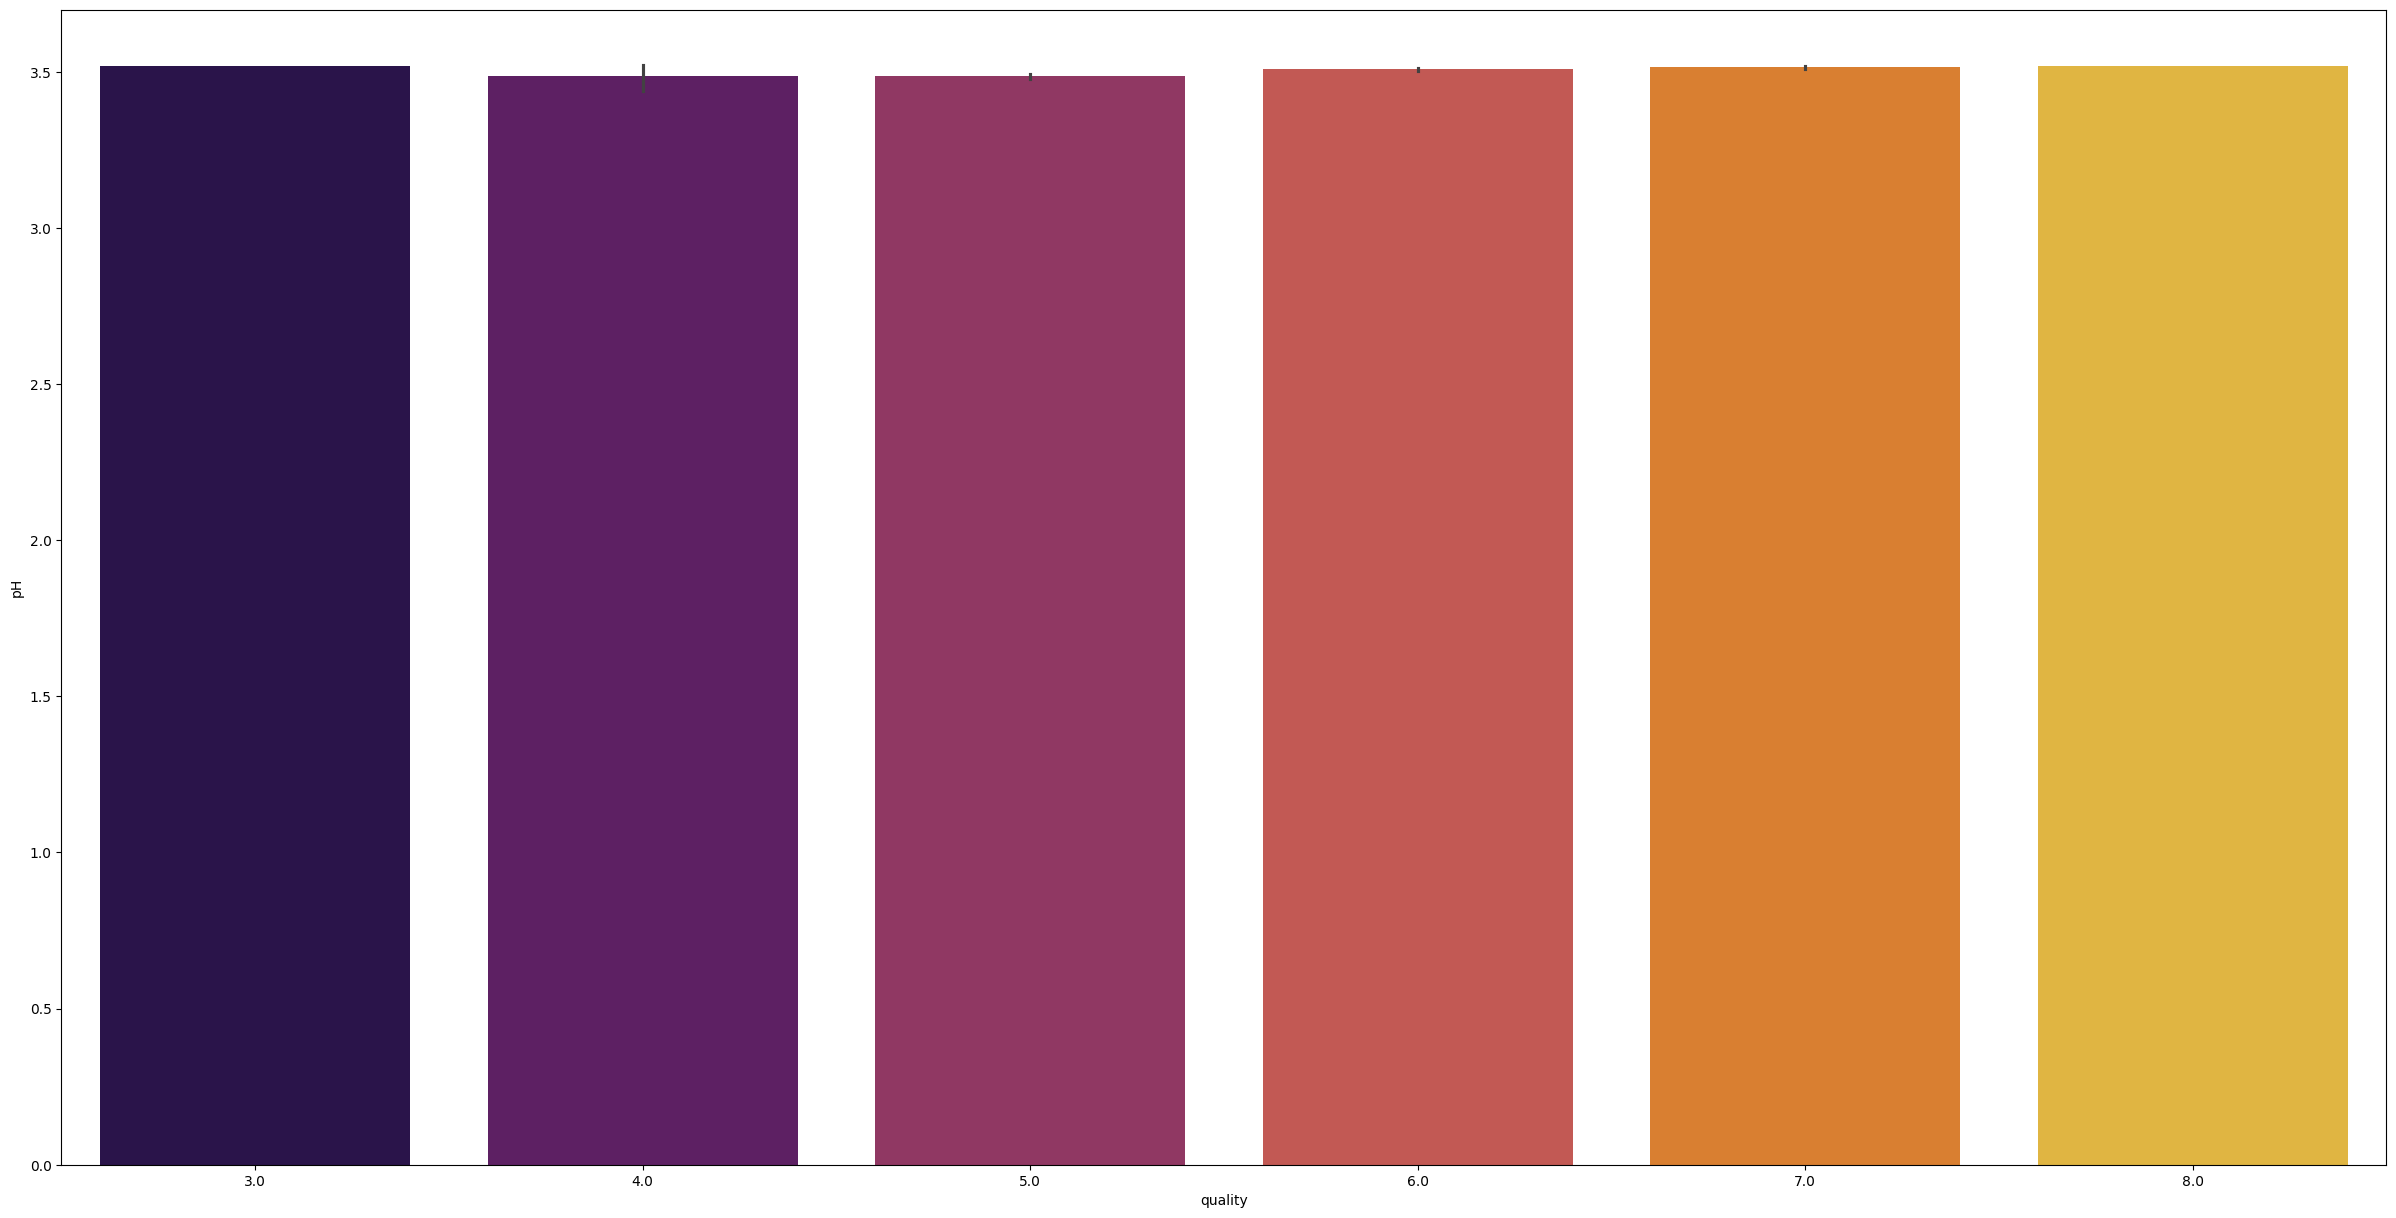

In [176]:
plt.figure(figsize=(30,15))
sns.barplot(y=data.pH,x=data.quality,palette='inferno')
plt.show()

C:\Users\aksha\AppData\Local\Temp\ipykernel_19132\2993666698.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data['volatile acidity'],x=data.quality,palette='inferno')


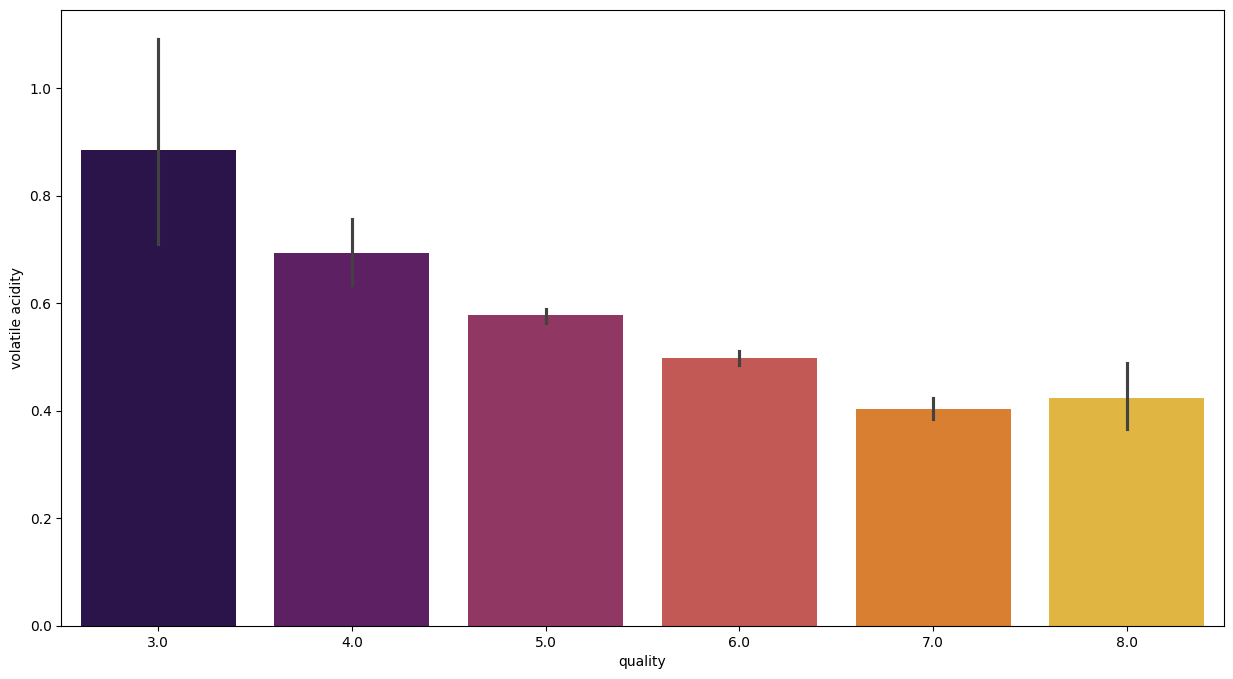

In [177]:
plt.figure(figsize=(15,8))
sns.barplot(y=data['volatile acidity'],x=data.quality,palette='inferno')
plt.show()

C:\Users\aksha\AppData\Local\Temp\ipykernel_19132\2578236629.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data['citric acid'],x=data.quality,palette='inferno')


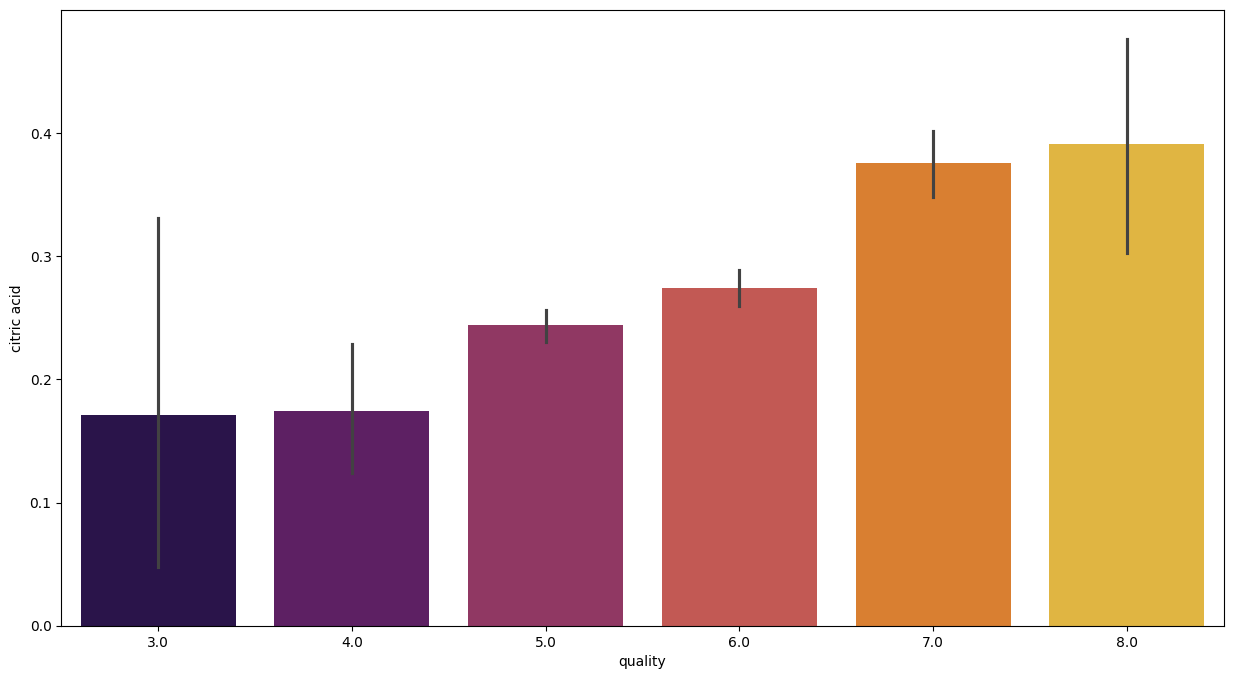

In [178]:
plt.figure(figsize=(15,8))
sns.barplot(y=data['citric acid'],x=data.quality,palette='inferno')
plt.show()

C:\Users\aksha\AppData\Local\Temp\ipykernel_19132\1447508041.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data['residual sugar'],x=data.quality,palette='inferno')


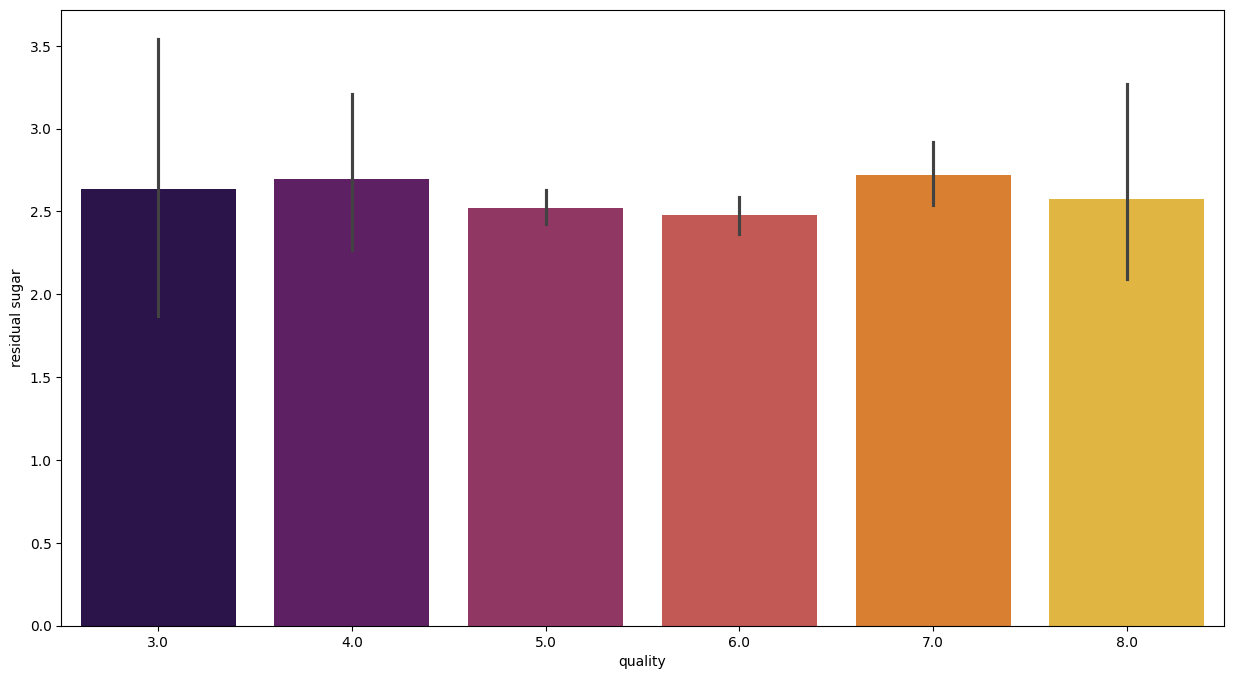

In [179]:
plt.figure(figsize=(15,8))
sns.barplot(y=data['residual sugar'],x=data.quality,palette='inferno')
plt.show()

C:\Users\aksha\AppData\Local\Temp\ipykernel_19132\2854861581.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data['chlorides'],x=data.quality,palette='inferno')


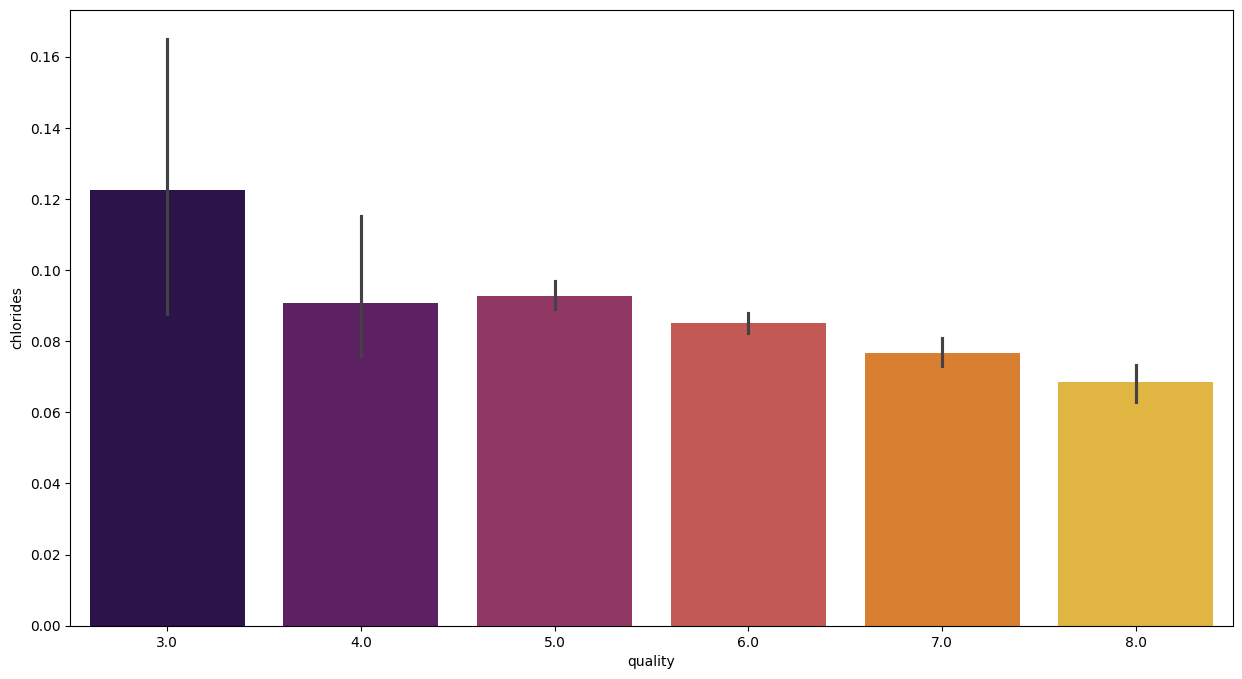

In [180]:
plt.figure(figsize=(15,8))
sns.barplot(y=data['chlorides'],x=data.quality,palette='inferno')
plt.show()

C:\Users\aksha\AppData\Local\Temp\ipykernel_19132\1638826431.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data['free sulfur dioxide'],x=data.quality,palette='inferno')


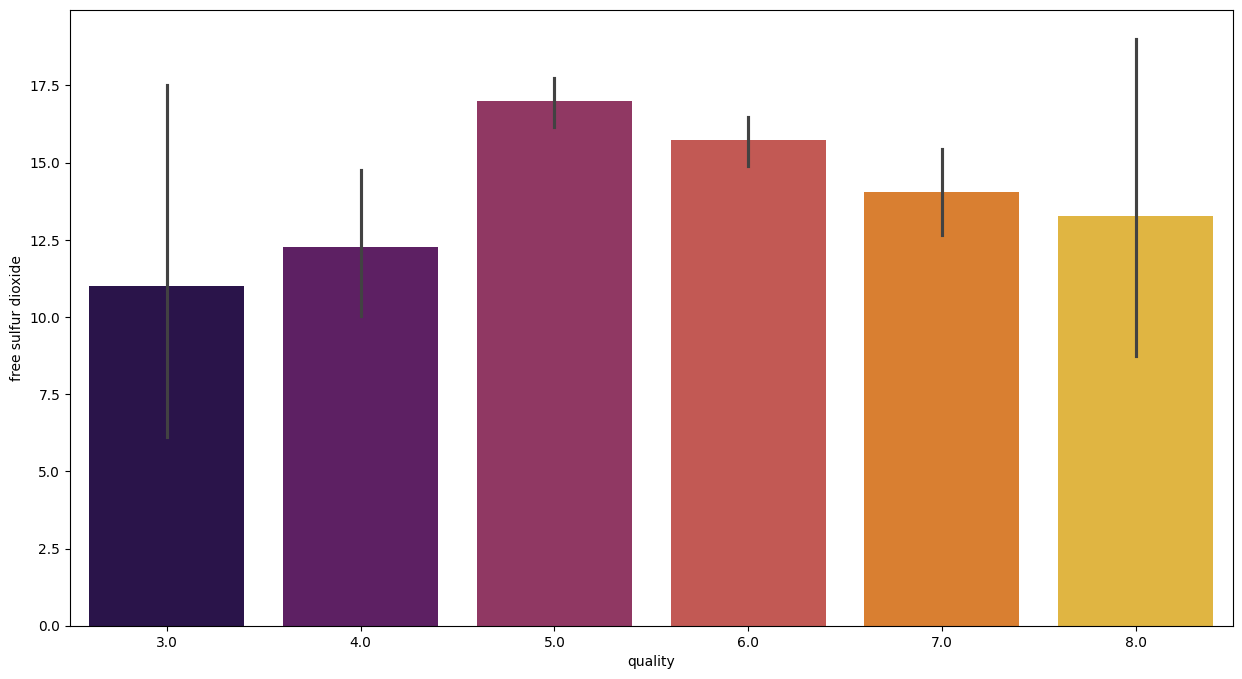

In [181]:
plt.figure(figsize=(15,8))
sns.barplot(y=data['free sulfur dioxide'],x=data.quality,palette='inferno')
plt.show()

C:\Users\aksha\AppData\Local\Temp\ipykernel_19132\1165918639.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data['total sulfur dioxide'],x=data.quality,palette='inferno')


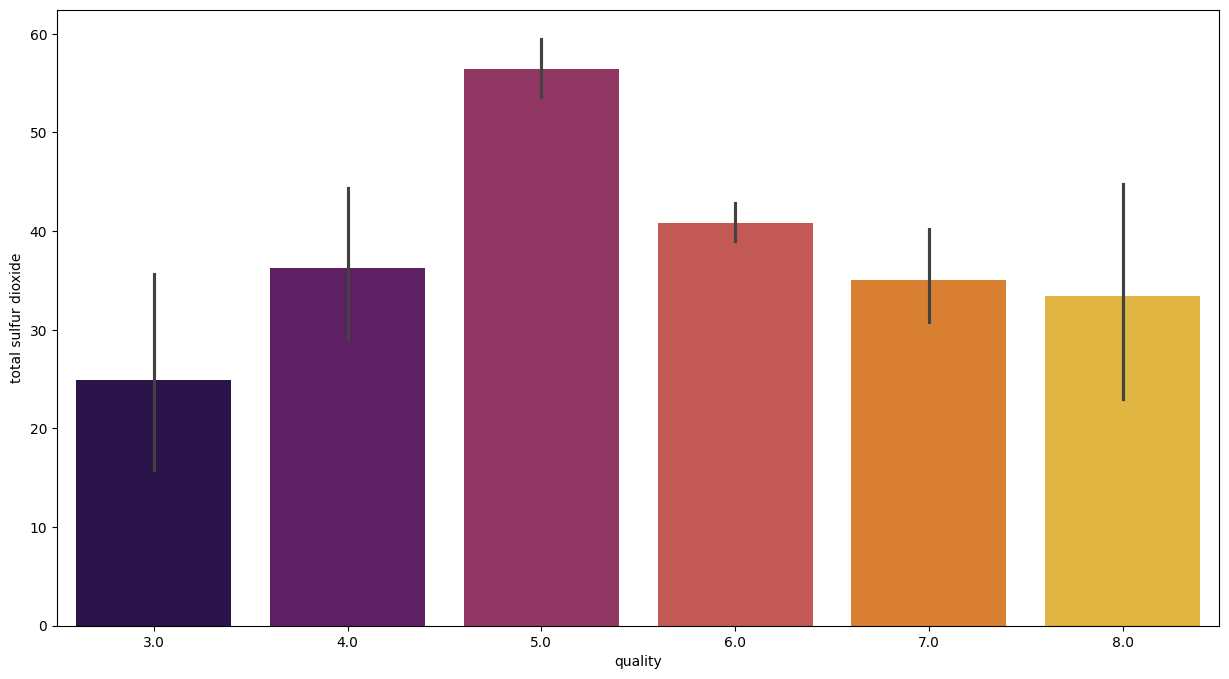

In [182]:
plt.figure(figsize=(15,8))
sns.barplot(y=data['total sulfur dioxide'],x=data.quality,palette='inferno')
plt.show()

C:\Users\aksha\AppData\Local\Temp\ipykernel_19132\3939007541.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data['density'],x=data.quality,palette='inferno')


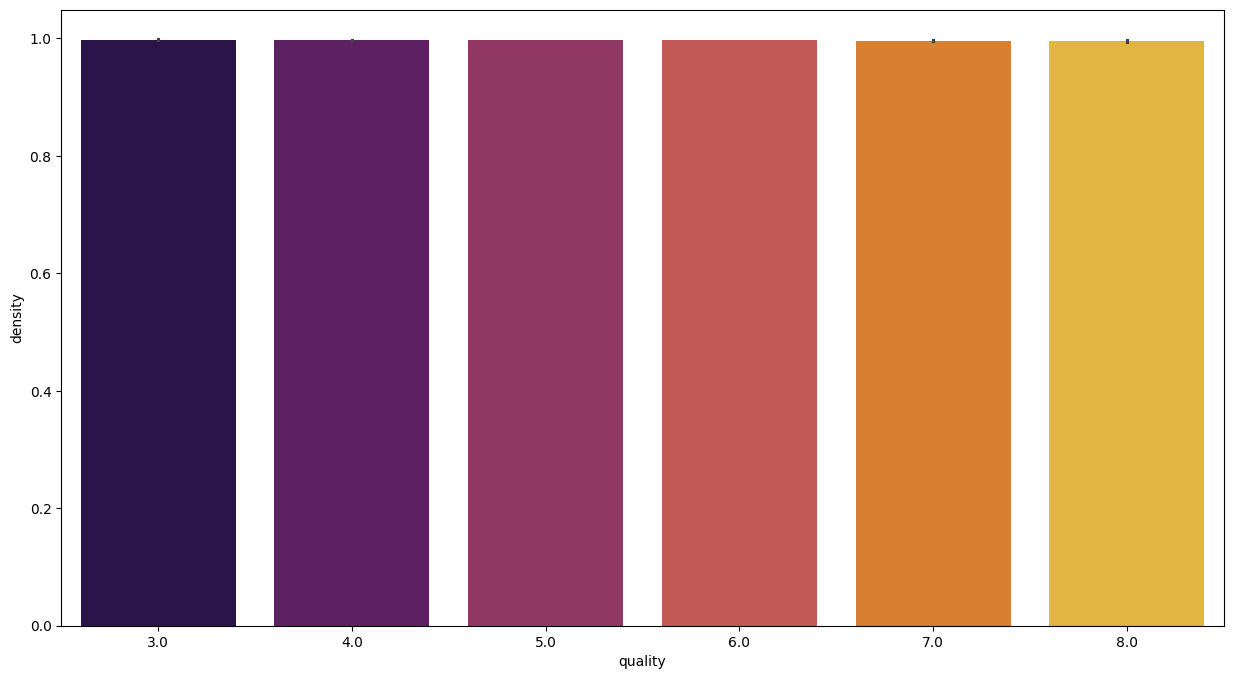

In [183]:
plt.figure(figsize=(15,8))
sns.barplot(y=data['density'],x=data.quality,palette='inferno')
plt.show()

C:\Users\aksha\AppData\Local\Temp\ipykernel_19132\3672395957.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data['sulphates'],x=data.quality,palette='inferno')


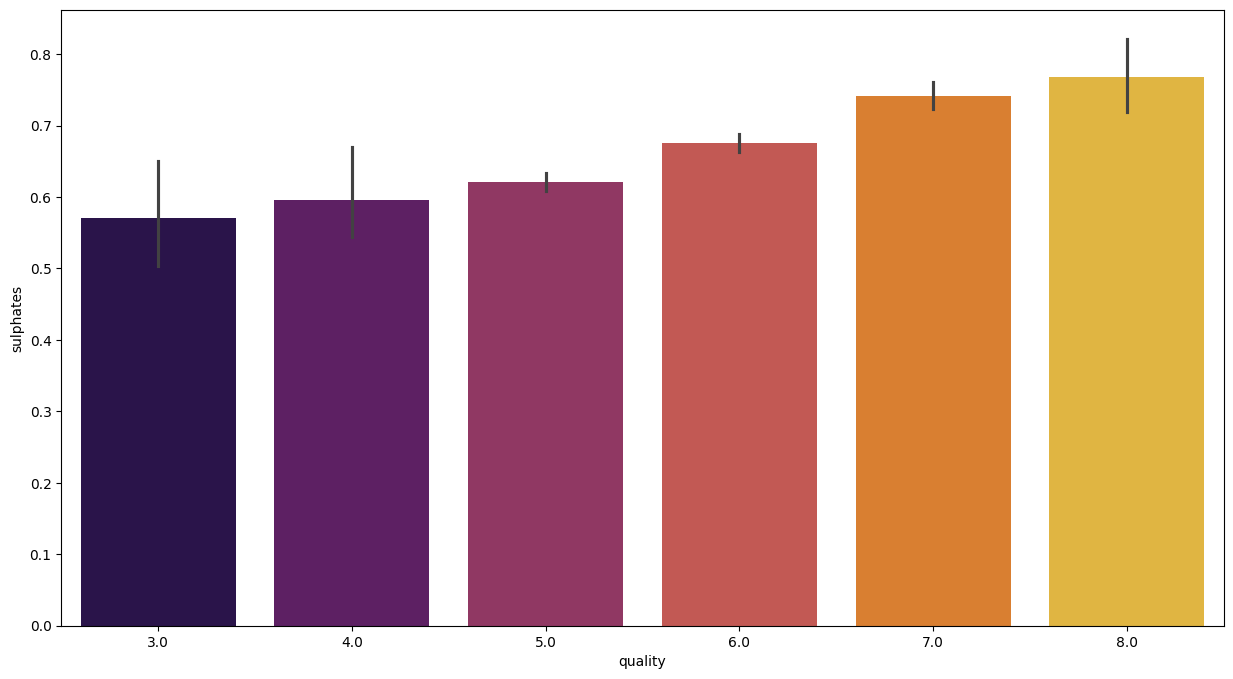

In [184]:
plt.figure(figsize=(15,8))
sns.barplot(y=data['sulphates'],x=data.quality,palette='inferno')
plt.show()

C:\Users\aksha\AppData\Local\Temp\ipykernel_19132\2060594016.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=data['alcohol'],x=data.quality,palette='inferno')


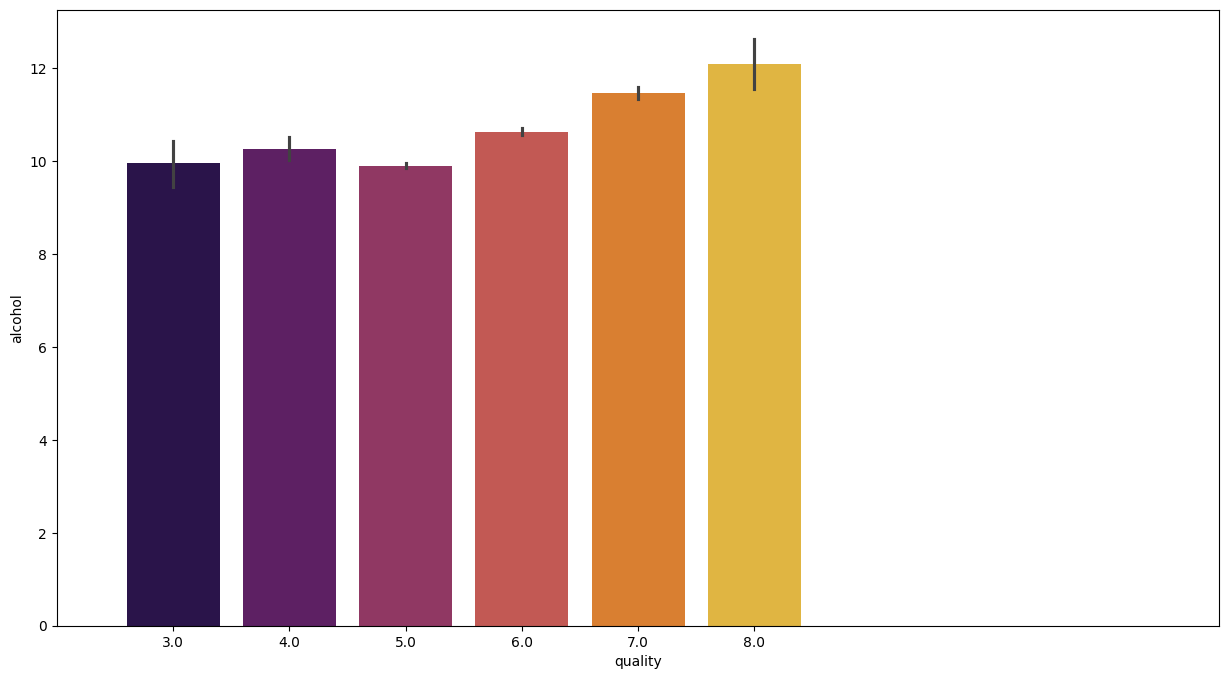

In [185]:
plt.figure(figsize=(15,8))
sns.barplot(y=data['alcohol'],x=data.quality,palette='inferno')
plt.xlim(-1,9)
plt.show()

In [186]:
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
420,9.5,0.56,0.33,2.4,0.089,35.0,67.0,0.99720,3.52,0.73,11.8,7.0
386,7.8,0.54,0.26,2.0,0.088,23.0,48.0,0.99810,3.52,0.74,9.2,6.0
1113,8.9,0.24,0.39,1.6,0.074,3.0,10.0,0.99698,3.52,0.59,9.5,6.0
1117,7.0,0.69,0.07,2.5,0.091,15.0,21.0,0.99572,3.52,0.60,11.3,6.0
423,10.5,0.24,0.47,2.1,0.066,6.0,24.0,0.99780,3.52,0.90,11.0,7.0


In [187]:
x = data.drop(columns='quality',axis=1)

In [188]:
y = data['quality'].apply(lambda value : 1 if value >= 7 else 0)

In [189]:
y.unique()

array([0, 1], dtype=int64)

In [190]:
std = StandardScaler()
x = std.fit_transform(x)

In [191]:
x

array([[-0.52904176,  0.96223523, -1.39192434, ...,  0.14057855,
        -0.57917007, -0.9610637 ],
       [-0.2993646 ,  1.96727417, -1.39192434, ..., -3.72131159,
         0.12865108, -0.58572765],
       [-0.2993646 ,  1.29724821, -1.18657111, ..., -2.97384898,
        -0.04830421, -0.58572765],
       ...,
       [-1.16065393, -0.09863921, -0.72452634, ...,  0.26515565,
         0.54154675,  0.54028048],
       [-1.39033109,  0.65514   , -0.77586465, ...,  0.26515565,
         0.30560636, -0.21039161],
       [-1.3329118 , -1.21534915,  1.02097612, ...,  0.26515565,
         0.01068089,  0.54028048]])

In [192]:
y


0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1596, dtype: int64

In [193]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [194]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
models = [DecisionTreeClassifier(), LogisticRegression(), SVC(kernel='poly'),RandomForestClassifier(),GradientBoostingClassifier()]

def accuracy(features,labels):
    for model in models:
        print(model)
        model.fit(features, labels)  # Assuming xtrain and ytrain are defined somewhere
        train_pred = model.predict(features)
        accuracy = accuracy_score(train_pred, labels)
        print(accuracy)
        print('---------------------------')
print('accuracy of train data\n===========================')
accuracy(features=xtrain,labels=ytrain)
print('\n\naccuracy of test data\n===========================')
accuracy(x_train=xtest,y_train=ytest)

accuracy of train data
DecisionTreeClassifier()
1.0
---------------------------
LogisticRegression()
0.883876357560568
---------------------------
SVC(kernel='poly')
0.9064327485380117
---------------------------
RandomForestClassifier()
1.0
---------------------------
GradientBoostingClassifier()
0.9640768588137009
---------------------------


accuracy of test data
DecisionTreeClassifier()
1.0
---------------------------
LogisticRegression()
0.8796992481203008
---------------------------
SVC(kernel='poly')
0.8922305764411027
---------------------------
RandomForestClassifier()
1.0
---------------------------
GradientBoostingClassifier()
0.9974937343358395
---------------------------


In [195]:
def crossval():
    for model in models:
        print(model)
        crossval = cross_val_score(model,xtest,ytest,cv=5)
        print('accuracy on each iteration',crossval)
        crossval = sum(crossval)/len(crossval)
        print('mean accuracy ',crossval)
crossval()

DecisionTreeClassifier()
accuracy on each iteration [0.9        0.8375     0.8        0.8625     0.84810127]
mean accuracy  0.849620253164557
LogisticRegression()
accuracy on each iteration [0.8875     0.875      0.85       0.9        0.83544304]
mean accuracy  0.8695886075949367
SVC(kernel='poly')
accuracy on each iteration [0.8875     0.8625     0.85       0.8875     0.86075949]
mean accuracy  0.8696518987341773
RandomForestClassifier()
accuracy on each iteration [0.9125     0.8625     0.85       0.875      0.87341772]
mean accuracy  0.8746835443037975
GradientBoostingClassifier()
accuracy on each iteration [0.9375     0.8375     0.8375     0.8875     0.87341772]
mean accuracy  0.8746835443037975


In [196]:
#creating dictionary that contains hyperparameter values for above mentioned models.

model_hyperparameters = {
    'DecisionTreeClassifier_hyperparameters': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'LogisticRegression_hyperparameters': {
        'penalty': ['l1', 'l2'],
        'C': [0.1, 1, 10],
        'fit_intercept': [True, False],
        'solver': ['liblinear', 'saga'],
        'max_iter': [100, 200, 500,1000,2000]
    },
    'SVC_hyperparameters': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'degree': [2, 3, 4],
        'gamma': ['scale', 'auto']
    },
    'RandomForestClassifier_hyperparameters': {
    'n_estimators': [50, 100, 200], 
    'criterion': ['gini', 'entropy'],  
    'max_depth': [None, 10, 20, 50],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 'log2']  
    }
    ,

    'GradientBoostingClassifier_hyperparameters': {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.05, 0.1, 0.2], 
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4], 
    'subsample': [0.8, 1.0]  
    }
}

In [197]:
model_keys = list(model_hyperparameters.keys())
model_keys

['DecisionTreeClassifier_hyperparameters',
 'LogisticRegression_hyperparameters',
 'SVC_hyperparameters',
 'RandomForestClassifier_hyperparameters',
 'GradientBoostingClassifier_hyperparameters']

In [198]:
models = [DecisionTreeClassifier(), LogisticRegression(), SVC(kernel='poly'),RandomForestClassifier(),GradientBoostingClassifier()]
def modelSelection(list_of_models,model_hyperparameters_dict):

    result = []
    i = 0

    for model in list_of_models:
        key = model_keys[i]

        params = model_hyperparameters_dict[key]

        i = i + 1

        print(model)
        print(params)

        classifier = RandomizedSearchCV(model,params,cv=5)
        classifier.fit(xtrain,ytrain)

        result.append({'model used' : model,
                       'highest score' : classifier.best_score_,
                       'best hyperparameters': classifier.best_params_})
        
    result_dataframe = pd.DataFrame(result,columns=['model used','highest score','best hyperparameters'])

    return result_dataframe


dataframe = modelSelection(list_of_models=models,model_hyperparameters_dict=model_hyperparameters)

DecisionTreeClassifier()
{'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 50], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
LogisticRegression()
{'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10], 'fit_intercept': [True, False], 'solver': ['liblinear', 'saga'], 'max_iter': [100, 200, 500, 1000, 2000]}
SVC(kernel='poly')
{'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [2, 3, 4], 'gamma': ['scale', 'auto']}
RandomForestClassifier()
{'n_estimators': [50, 100, 200], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 50], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['auto', 'sqrt', 'log2']}


c:\Users\aksha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\aksha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\aksha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\aksha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py",

GradientBoostingClassifier()
{'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'subsample': [0.8, 1.0]}


In [199]:
pd.set_option('display.max_colwidth', None)
dataframe

,model used,highest score,best hyperparameters
0,DecisionTreeClassifier(),0.871381,"{'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20, 'criterion': 'gini'}"
1,LogisticRegression(),0.882200,"{'solver': 'liblinear', 'penalty': 'l2', 'max_iter': 2000, 'fit_intercept': True, 'C': 0.1}"
2,SVC(kernel='poly'),0.887225,"{'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'C': 1}"
3,RandomForestClassifier(),0.900607,"{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'criterion': 'gini'}"
4,GradientBoostingClassifier(),0.903110,"{'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.1}"


In [13]:
# from sklearn.metrics import precision_score, recall_score, f1_score

# models = [DecisionTreeClassifier(criterion= 'entropy', max_depth= 20, min_samples_leaf= 1, min_samples_split= 5), LogisticRegression(C= 0.1, fit_intercept= True, max_iter= 1000, penalty= 'l2', solver= 'saga'), SVC(C= 1, degree= 4, gamma= 'scale', kernel= 'rbf'),RandomForestClassifier(n_estimators= 200, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 20, criterion= 'entropy'),GradientBoostingClassifier(subsample= 0.8, n_estimators= 100, min_samples_split= 2, min_samples_leaf= 1, max_depth= 7, learning_rate= 0.05)]

# def precision_recall_f1(x_featues, true_lab):
#     for model in models:

#         print(model)
#         model.fit(x_featues, true_lab)  # Assuming xtrain and ytrain are defined somewhere
#         pred = model.predict(xtest)
        
#         accuracy = accuracy_score(ytest,pred)
#         precision_value = precision_score(ytest,pred, average='weighted', zero_division=1)
#         recall_value = recall_score(ytest,pred, average='weighted')
#         f1_value = f1_score(ytest,pred, average='weighted')

#         print('precision_score : ', precision_value)
#         print('recall_score :', recall_value)
#         print('f1_score :', f1_value)
#         print('accuracy_score :', accuracy)
#         print('=======================================')

# precision_recall_f1(xtrain,ytrain)

In [201]:
model = RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=5,n_estimators=200)
model.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=5,
                       n_estimators=200)

In [202]:
train_pred = model.predict(xtest)
accuracy = accuracy_score(ytest,train_pred)
accuracy

0.9072681704260651

In [207]:
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
966,9.0,0.38,0.41,2.4,0.103,6.0,10.0,0.99604,3.52,0.58,11.9,7.0
561,9.0,0.44,0.49,2.4,0.078,26.0,121.0,0.99780,3.52,0.58,9.2,5.0
1532,7.2,0.53,0.13,2.0,0.058,18.0,22.0,0.99573,3.52,0.68,9.9,6.0
421,6.6,0.84,0.03,2.3,0.059,32.0,48.0,0.99520,3.52,0.56,12.3,7.0
394,12.7,0.60,0.65,2.3,0.063,6.0,25.0,0.99970,3.52,0.57,9.9,5.0


In [211]:
input = (9.0,0.44,0.49,2.4,0.078,26.0,121.0,0.99780,3.52,0.58,9.2)
input = np.asarray(input).reshape(1,-1)
input = std.transform(input)
pred = model.predict(input)
pred

c:\Users\aksha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [212]:
if pred[0] == 0:
    print('not a good quality wine')
else:
    print('good quality wine')

not a good quality wine
